예제1. 어떤 회사의 연도별 매출이 광고비에 의존한다고 가정하자. 아래 데이터가 주어질 때, 광고비가 8일때의 매출을 예상하세요
|광고비(x)|매출(y)|
|-----|----|
|2|81|
|4|93|
|6|91|
|8|?|

- y = ax+b
- 81 = 2a+b
- 93 = 4a+b
- 91 = 6a+b
- ? = 8a+b

In [ ]:
import numpy as np

# 데이터 준비하기
X = np.array([2,4,6])
y = np.array([81,93,91])

# 최소제곱법 (먼저, 평균을 구하기)
# X_mean = np.mean(X)
# y_mean = np.mean(y)

# 최소제곱법 계산 (계산)
# 공분산 / 분산 = 통계적으로 a(기울기)를 구할 수 있음
# 제곱의 합(SS) 이 최소가 되는 해 
# a = np.sum((X-X_mean)*(y-y_mean))/np.sum((X-X_mean)**2)
# b = y_mean - a*X_mean

## np.linalg.lstsq() 함수를 이용해서 최소제곱법 계산
X = np.column_stack([X,np.ones(len(X))]) # X(콜롬)에 b 계수(1로 채워짐)를 추가함
a, b = np.linalg.lstsq(X, y)[0]

print(f"기울기 : {a:.2f}, 절편 : {b:.2f}")

x_pred = 8
y_pred = a * x_pred + b
print(f"광고비가 8일 때 예측 매출 : {y_pred:.2f}")

기울기 : 2.50, 절편 : 78.33
광고비가 8일 때 예측 매출 : 98.33


예제2. 어떤 회사에서 만드는 물건의 판매량이 가격과 온도에 영향을 받는다. 가격이 8, 온도가 24일때의 판매량을 예상하세요
|가격(x1)|온도(x2)|판매량(y)|
|-----|----|---|
|5|20|65|
|7|22|70|
|9|23|60|
|8|24|?|

- y = a1x1+a2x2+b

In [ ]:
import numpy as np

# 데이터 준비하기
X = np.array([[5,20],[7,22],[9,23]])
y = np.array([65,70,60])

## np.linalg.lstsq() 함수를 이용해서 최소제곱법 계산
X_bias = np.column_stack([X,np.ones(len(X))])
coeffs = np.linalg.lstsq(X_bias,y)[0]
print(coeffs) # 독립변인의 갯수만큼 기울기가 구해짐 -> 여기선 기울기가 2개임
# a1, a2, b = np.linalg.lstsq(X_bias,y)[0]

print(f"기울기 a1 : {coeffs[0]:.2f}, 기울기 a2 : {coeffs[1]:.2f}, 절편 : {coeffs[-1]:.2f}")

x_pred = [8,24]
#np.dot() 이용해서 coeffs와 x_pred의 행렬곱을 계산
x_pred = [8,24, 1] # bias를 직접 집어넣기
y_pred = np.dot(x_pred, coeffs)
print(f"광고비가 8일 때 예측 매출 : {y_pred:.2f}")

[ -12.5   15.  -172.5]
기울기 a1 : -12.50, 기울기 a2 : 15.00, 절편 : -172.50
광고비가 8일 때 예측 매출 : 87.50


## Numpy를 활용한 선형회귀 모델 (ver.1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score # 평가를 위해 추가


In [24]:
# 먼저, 아이리스 데이터를 판다스로 변환** >> 일단 변환을 해야 뒤로 나갈 수 있음
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target # target 이라는 col을 추가
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


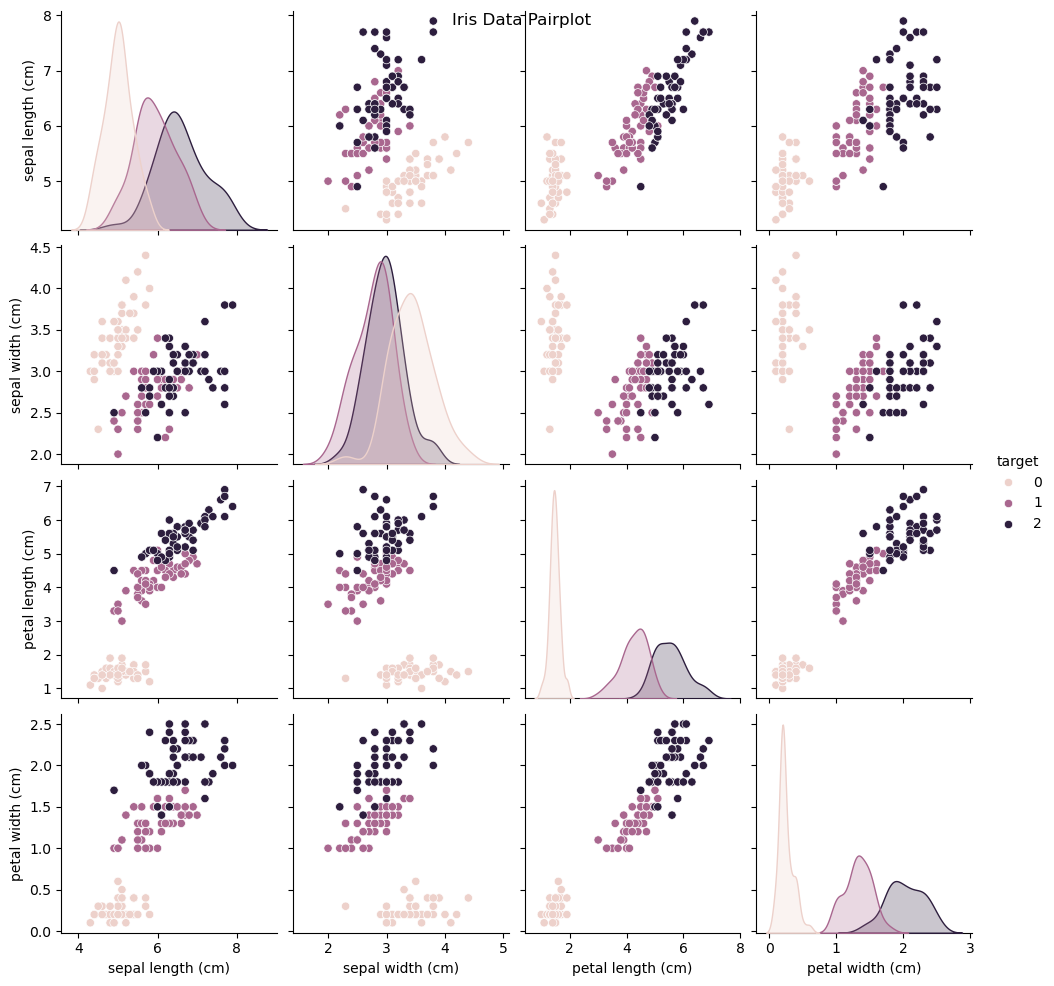

In [20]:
sns.pairplot(iris_df, hue="target")
plt.suptitle("Iris Data Pairplot")
plt.show()

In [33]:
# target은 실수 또는 연속된 숫자여야 함 -> 범주형은 X

# x, y 를 결정하기 
#iris_df.info() # sepal width (cm) 를 y로 결정 -> 1번 인덱스
y = iris.data[:,1] # 답안지 
X = np.column_stack([iris.data[:,0], iris.data[:,2], iris.data[:,3]]) # 문제지
print(X.shape, y.shape)

(150, 3) (150,)


In [37]:
# 데이터를 나누는(학습용/예측테스트용) 함수

def custom_train_test_split(X,y, test_size = 0.3, random_stat = 42):
    np.random.seed(random_stat)
    indexes = np.random.permutation(len(X))
    split_idx = int(len(X)*(1-test_size))
    train_idx = indexes[:split_idx] # 학습에 사용될 데이터 인덱스
    test_idx = indexes[split_idx:] # 테스트에 사용될 데이터 인덱스

    X_train = X[train_idx] # 학습에 사용될 X 데이터ㄴ
    X_test = X[test_idx] # 테스트에 사용될 X 데이터
    y_train = y[train_idx] # 학습에 사용될 y 데이터
    y_test = y[test_idx]  # 테스트에 사용될 y 데이터

    return X_train, X_test,  y_train, y_test

In [ ]:
X_train, X_test,  y_train, y_test = custom_train_test_split(X,y)
print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape) # 문제지(X)-정답지(y)의 갯수가 동일한지 확인 

(105, 3) (45, 3) (105,) (45,)


In [45]:
# 최소제곱법을 계산하는 함수
def fit_linear_regression_lsq(X,y):
    X_bias = np.column_stack([np.ones(len(X)),X]) # 절편을 X의 col에 추가했음 -> 어떻게 집어넣는지에 따라 coefficients 값(순서)이 달라짐
    coefficients, residauals, rank, s = np.linalg.lstsq(X_bias,y)


    intercept_ = coefficients[0] # 절편
    coeffs_ = coefficients[1:] # X의 계수들

    return coeffs_, intercept_

In [44]:
X_bias = np.column_stack([np.ones(len(X)),X]) 
coefficients, residauals, rank, s = np.linalg.lstsq(X_bias,y) # 리턴값? (?, 잔차, 차수, 특이값) --> ?만 필요함![0]으로 구했었음

coefficients

array([ 1.04308908,  0.60706601, -0.58603225,  0.55803034])

In [47]:
# 예측 함수
def predict_linear_regression_lsq(X,coeffs_, intercept_):
    return X @ coeffs_ + intercept_

In [ ]:
coeffs_, intercept_ = fit_linear_regression_lsq(X_train,y_train)
y_pred_custom = predict_linear_regression_lsq(X_test,coeffs_, intercept_) # X test 로 y 값 예측하기
y_pred_custom

array([3.17669598, 3.11943661, 2.68804297, 3.25290559, 2.77343932,
       3.15154404, 2.98240241, 3.37705118, 3.07083024, 3.34271592,
       3.2459918 , 2.98708495, 3.04634869, 3.01763154, 2.6457251 ,
       2.83292652, 3.1691152 , 3.11792087, 2.44880187, 3.53633909,
       2.74467705, 2.82784215, 2.93339421, 3.50289428, 2.60006207,
       3.13477652, 2.95751904, 3.27720878, 3.14391815, 3.32755436,
       3.24135436, 3.06423013, 2.57357275, 2.81174504, 2.76719592,
       3.03569133, 3.16224652, 2.62119845, 2.60273684, 3.48443266,
       3.13950418, 2.23863464, 4.05014063, 2.88795465, 3.08269174])

In [54]:
# 성능을 평가
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
print(mse_custom, r2_custom)

0.0847219715794219 0.3810001715675807


In [64]:
# sklearn의 LinearRegression() 함수를 이용 -> 위에서 만든 과정과 동일함
from sklearn.linear_model import LinearRegression # 선형회귀 함수(모델만들기 + 예측함수 자동 생성)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(mse_lr, r2_lr)

0.08472197157942139 0.3810001715675845


In [65]:
# sklearn의 BayesianRidge() 함수를 이용 
# 선형회귀 함수보다 낫나?
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)
mse_br = mean_squared_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)
print(mse_br, r2_br)

0.08450878298803613 0.3825577805210957


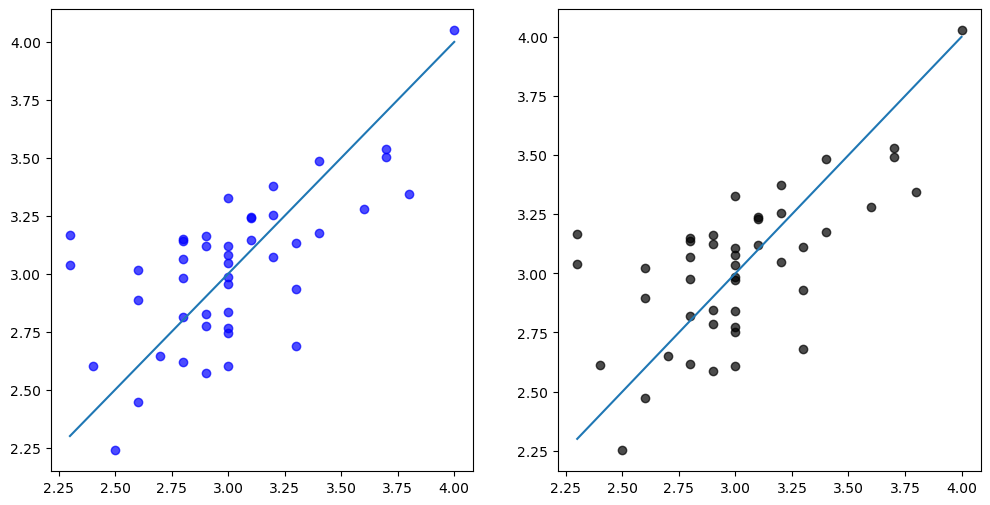

In [66]:
# 시각화
fig, axes = plt.subplots(1,2, figsize = (12,6))

axes[0].scatter(y_test, y_pred_custom, alpha = 0.7, color = "blue")
axes[0].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])
axes[1].scatter(y_test, y_pred_br, alpha = 0.7, color = "black")
axes[1].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])